In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from optimize_hexs0 import evaluate, eval_q
import multiprocessing as mp
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import json

/storage1/fs1/chien-ju.ho/Active/.conda/envs/mapping/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
hs = 200
network = 'old'

path = f"data/metrostl/{network}"
with open(f"{path}/headways.json", 'r') as f:
    current_headways = json.load(f)

df_route_lens = pd.read_csv(f"{path}/processed/route_lens.csv", index_col="route_id")
base_drivers = {k: df_route_lens.loc[k].trip_len / v for k, v in current_headways.items()}
base_sum = sum(base_drivers.values())
drivers = {k:base_sum/len(base_drivers) for k in base_drivers} # All routes are the same to start
base_sum

98.83333333333333

In [4]:
%%time
evaluate(base_drivers, hs=hs, max_dist=7200, orig='POP21', dest='C000', pct=True, scale=True, network=network)

CPU times: user 12.6 s, sys: 29.2 ms, total: 12.6 s
Wall time: 12.8 s


0.17971300405019475

In [5]:
%%time
res_old = evaluate(base_drivers, hs=hs, max_dist=7200, orig='POP21', dest='C000', pct=True, scale=True, vis=True, network=network)

ERROR 1: PROJ: proj_create_from_database: Open of /storage1/fs1/chien-ju.ho/Active/.conda/envs/mapping/share/proj failed
100%|██████████| 15087/15087 [00:12<00:00, 1195.22it/s]


0.17971300405019475
CPU times: user 16.5 s, sys: 216 ms, total: 16.7 s
Wall time: 19.1 s


<Axes: >

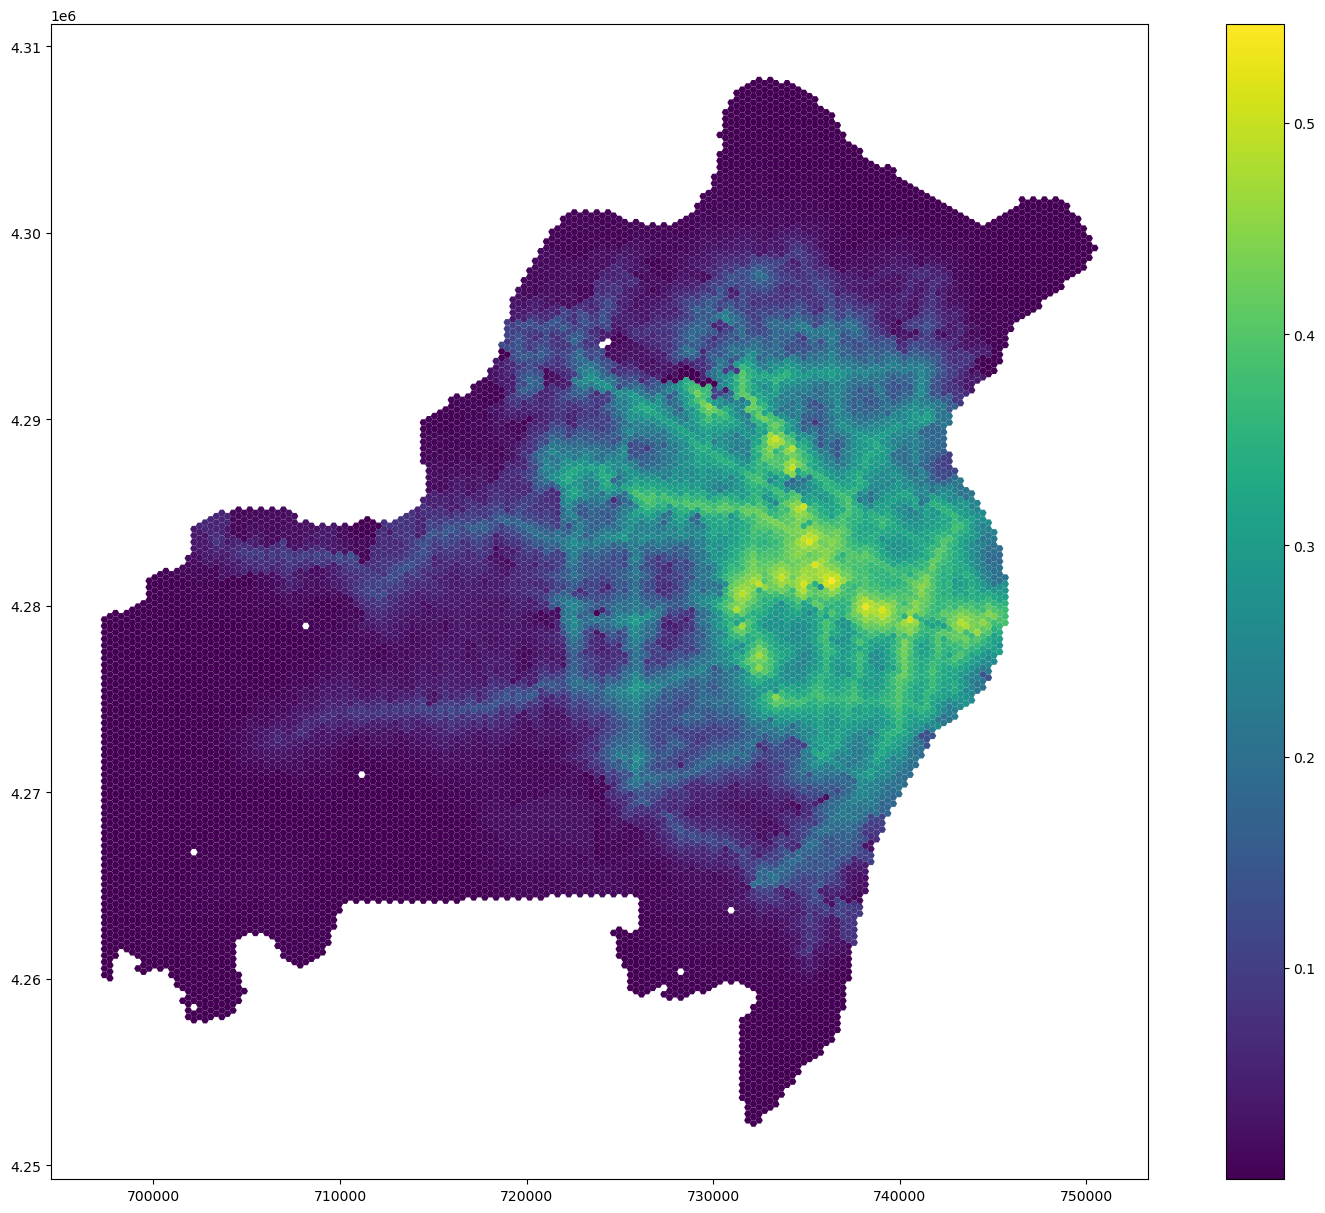

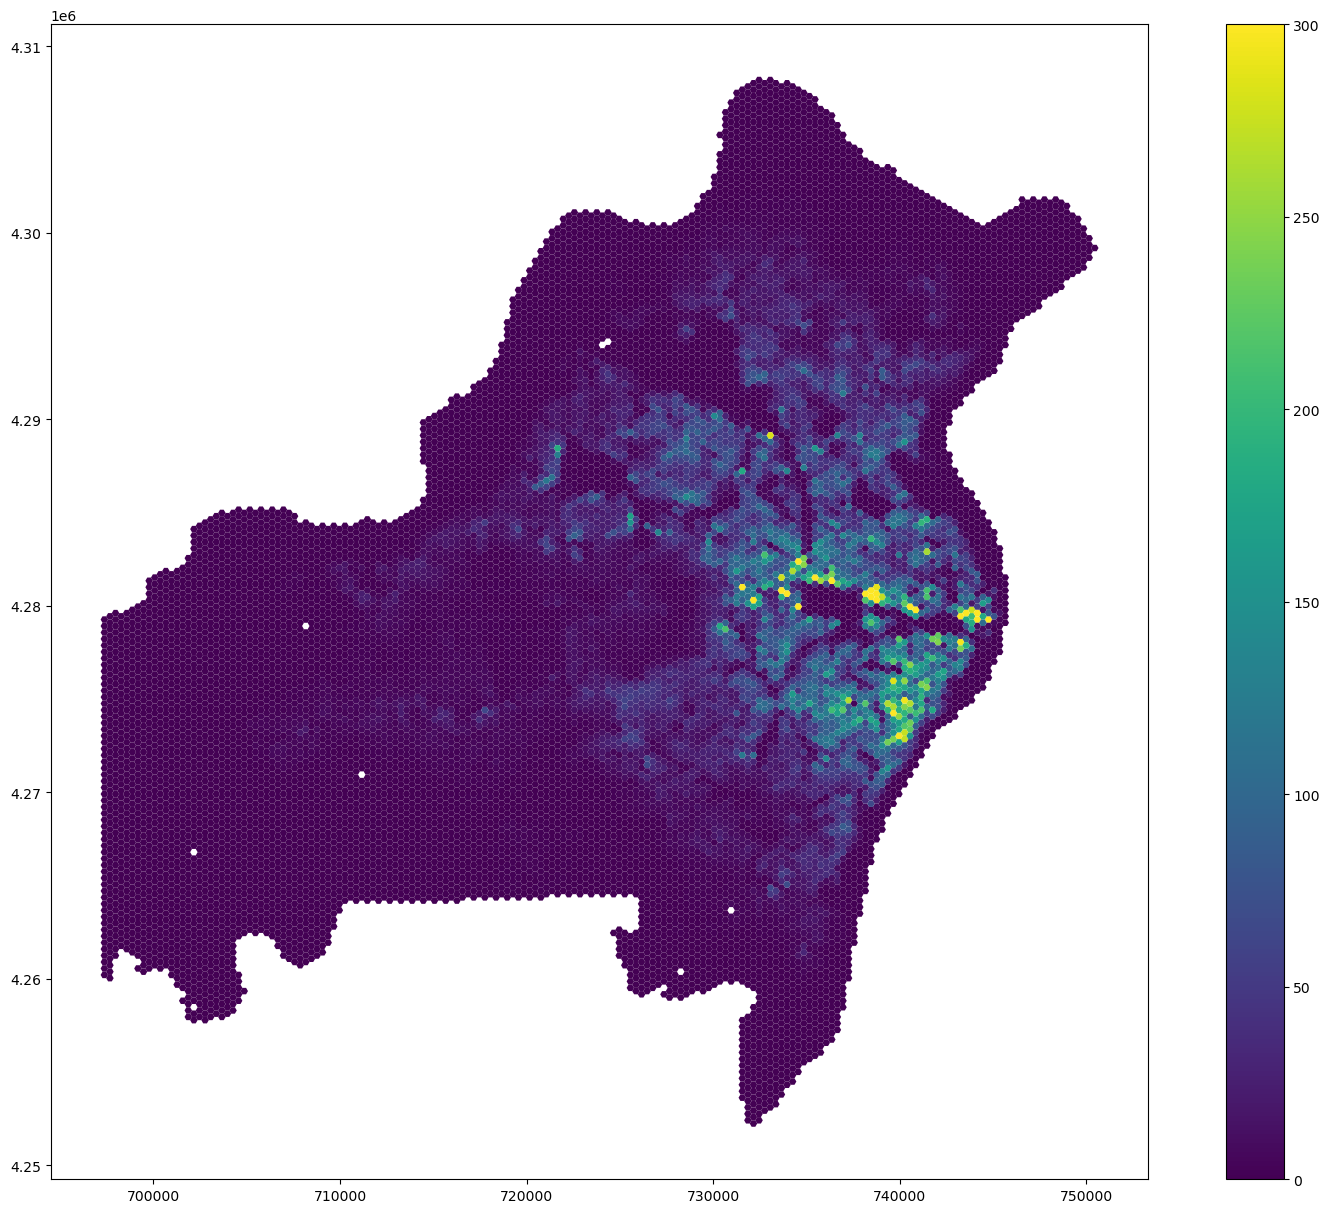

In [6]:
res_old.plot('reached', legend=True, figsize=(20,15))
res_old.plot('reached_scaled', legend=True, figsize=(20,15), vmax=300)
# plt.savefig('test.png', bbox_inches='tight')
# plt.close()

In [7]:
hs = 200
network = 'new'

path = f"data/metrostl/{network}"
with open(f"{path}/headways.json", 'r') as f:
    current_headways = json.load(f)

df_route_lens = pd.read_csv(f"{path}/processed/route_lens.csv", index_col="route_id")
base_drivers = {k: df_route_lens.loc[k].trip_len / v for k, v in current_headways.items()}
base_sum = sum(base_drivers.values())
drivers = {k:base_sum/len(base_drivers) for k in base_drivers} # All routes are the same to start
base_sum

FileNotFoundError: [Errno 2] No such file or directory: 'data/metrostl/new/headways.json'

In [ ]:
%%time
res_new = evaluate(base_drivers, hs=hs, max_dist=7200, orig='POP21', dest='C000', pct=True, scale=True, vis=True, network=network)

In [ ]:
res_new.plot('reached', legend=True, figsize=(20,15))
res_new.plot('reached_scaled', legend=True, figsize=(20,15), vmax=300)
# plt.savefig('test.png', bbox_inches='tight')
# plt.close()

In [ ]:
%%time
res_new['reached_diff'] = res_new.reached - res_old.reached
res_new['reached_scaled_diff'] = res_new.reached_scaled - res_old.reached_scaled

In [ ]:
res_new.plot('reached_scaled', legend=True, figsize=(20,15), vmax=300)
res_new.plot('reached_scaled_diff', legend=True, figsize=(20,15), vmax=50, vmin=-50, cmap='PiYG')
# plt.savefig('test.png', bbox_inches='tight')
# plt.close()